# Working with Methods in Pandas - Part 1 

In [4]:
import pandas as pd ; import numpy as np

In [5]:
date=pd.date_range(
    start="2018",end="2019", freq="BM")

In [6]:
ts=pd.Series(
    np.random.randn(len(date)),index=date)
ts

2018-01-31    1.685786
2018-02-28    2.113793
2018-03-30   -0.851731
2018-04-30   -0.149779
2018-05-31    2.072918
2018-06-29    0.348972
2018-07-31   -0.413509
2018-08-31    0.595509
2018-09-28    0.317852
2018-10-31    0.093565
2018-11-30    0.706336
2018-12-31   -0.620341
Freq: BM, dtype: float64

In [7]:
ts.index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-30', '2018-04-30',
               '2018-05-31', '2018-06-29', '2018-07-31', '2018-08-31',
               '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='BM')

In [8]:
ts[:5].index

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-30', '2018-04-30',
               '2018-05-31'],
              dtype='datetime64[ns]', freq='BM')

## Reading a Time Series Data Set

In [10]:
fb=pd.read_csv("DataSets/FB.csv")

In [11]:
fb.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-30,175.300003,175.300003,166.559998,171.059998,171.059998,65280800
1,2018-07-31,170.669998,174.240005,170.000000,172.580002,172.580002,40356500
2,2018-08-01,173.929993,175.080002,170.899994,171.649994,171.649994,34042100
3,2018-08-02,170.679993,176.789993,170.270004,176.369995,176.369995,32400000
4,2018-08-03,177.690002,178.850006,176.149994,177.779999,177.779999,24763400


## Converting date to index

In [12]:
fb.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [13]:
fb=pd.read_csv(
    "DataSets/FB.csv", parse_dates=["Date"])

In [14]:
fb=pd.read_csv(
    "DataSets/FB.csv", 
    parse_dates=["Date"], 
    index_col="Date")

In [15]:
fb.index

DatetimeIndex(['2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10',
               ...
               '2019-07-16', '2019-07-17', '2019-07-18', '2019-07-19',
               '2019-07-22', '2019-07-23', '2019-07-24', '2019-07-25',
               '2019-07-26', '2019-07-29'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [16]:
fb.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-30,175.300003,175.300003,166.559998,171.059998,171.059998,65280800
2018-07-31,170.669998,174.240005,170.000000,172.580002,172.580002,40356500
2018-08-01,173.929993,175.080002,170.899994,171.649994,171.649994,34042100
2018-08-02,170.679993,176.789993,170.270004,176.369995,176.369995,32400000
2018-08-03,177.690002,178.850006,176.149994,177.779999,177.779999,24763400


## Working with Indexes

In [22]:
fb.loc['2018-07-30'].Close.mean()

171.059998

In [23]:
fb.loc["2019-07-05":"2019-07-10"]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-05,196.179993,197.070007,194.169998,196.399994,196.399994,11164100
2019-07-08,195.190002,196.679993,193.639999,195.759995,195.759995,9723900
2019-07-09,194.970001,199.460007,194.889999,199.210007,199.210007,14698600
2019-07-10,200.000000,202.960007,199.669998,202.729996,202.729996,20571700


In [24]:
t=pd.to_datetime("7/22/2019")
t

Timestamp('2019-07-22 00:00:00')

In [25]:
fb.loc[fb.index>=t,:]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-22,199.910004,202.570007,198.809998,202.320007,202.320007,13589000
2019-07-23,202.839996,204.240005,200.960007,202.360001,202.360001,14583700
2019-07-24,197.630005,204.809998,197.220001,204.660004,204.660004,32532500
2019-07-25,206.699997,208.660004,198.259995,200.710007,200.710007,39889900
2019-07-26,200.190002,202.880005,196.250000,199.750000,199.750000,24426700
2019-07-29,199.000000,199.590302,197.880005,198.059998,198.059998,754198


## Dating the Data Set

In [26]:
fb1=pd.read_csv("DataSets/FB-no-date.csv",sep=";")

In [27]:
fb1.head()

,Open,High,Low,Close,Adj Close,Volume
0,162600006,163130005,161690002,162279999,162279999,11097800
1,163899994,167500000,163830002,167369995,167369995,18894700
2,167369995,171880005,166550003,171259995,171259995,28187900
3,172899994,173570007,171270004,172509995,172509995,21531700
4,171500000,171740005,167610001,169130005,169130005,18306500


In [28]:
dates=pd.date_range(start="03/01/2019", 
                    end="03/29/2019", 
                    freq="B") 
dates

DatetimeIndex(['2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29'],
              dtype='datetime64[ns]', freq='B')

In [29]:
fb1.set_index(dates,inplace=True)

In [30]:
fb1.head()

,Open,High,Low,Close,Adj Close,Volume
2019-03-01,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-04,163899994,167500000,163830002,167369995,167369995,18894700
2019-03-05,167369995,171880005,166550003,171259995,171259995,28187900
2019-03-06,172899994,173570007,171270004,172509995,172509995,21531700
2019-03-07,171500000,171740005,167610001,169130005,169130005,18306500


In [31]:
fb1.index

DatetimeIndex(['2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29'],
              dtype='datetime64[ns]', freq='B')

## Visualizing Time Series Data

In [32]:
%matplotlib inline

<Axes: >

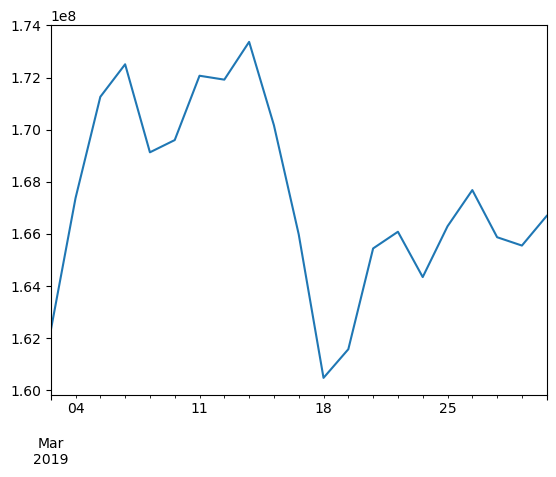

In [33]:
fb1.Close.plot()

In [34]:
fb1.asfreq("H",method="pad").head()

,Open,High,Low,Close,Adj Close,Volume
2019-03-01 00:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 01:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 02:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 03:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 04:00:00,162600006,163130005,161690002,162279999,162279999,11097800


In [35]:
fb1.asfreq("W", method="pad")

,Open,High,Low,Close,Adj Close,Volume
2019-03-03,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-10,166199997,169619995,165970001,169600006,169600006,13184800
2019-03-17,167160004,167580002,162509995,165979996,165979996,37135400
2019-03-24,165649994,167419998,164089996,164339996,164339996,16389200


In [36]:
fb1.asfreq("H", method="pad")

,Open,High,Low,Close,Adj Close,Volume
2019-03-01 00:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 01:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 02:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 03:00:00,162600006,163130005,161690002,162279999,162279999,11097800
2019-03-01 04:00:00,162600006,163130005,161690002,162279999,162279999,11097800
...,...,...,...,...,...,...
2019-03-28 20:00:00,164570007,166720001,163330002,165550003,165550003,10443000
2019-03-28 21:00:00,164570007,166720001,163330002,165550003,165550003,10443000
2019-03-28 22:00:00,164570007,166720001,163330002,165550003,165550003,10443000
2019-03-28 23:00:00,164570007,166720001,163330002,165550003,165550003,10443000


In [37]:
z=pd.date_range(start="3/1/2019", 
                periods=60 , freq="B")
z

DatetimeIndex(['2019-03-01', '2019-03-04', '2019-03-05', '2019-03-06',
               '2019-03-07', '2019-03-08', '2019-03-11', '2019-03-12',
               '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-25', '2019-03-26', '2019-03-27', '2019-03-28',
               '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01',
               '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07',
               '2019-05-08', '2019-05-09', '2019-05-10', '2019-05-13',
               '2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17',
      

In [38]:
z=pd.date_range(
    start="3/1/2019", periods=30, freq="H")
z

DatetimeIndex(['2019-03-01 00:00:00', '2019-03-01 01:00:00',
               '2019-03-01 02:00:00', '2019-03-01 03:00:00',
               '2019-03-01 04:00:00', '2019-03-01 05:00:00',
               '2019-03-01 06:00:00', '2019-03-01 07:00:00',
               '2019-03-01 08:00:00', '2019-03-01 09:00:00',
               '2019-03-01 10:00:00', '2019-03-01 11:00:00',
               '2019-03-01 12:00:00', '2019-03-01 13:00:00',
               '2019-03-01 14:00:00', '2019-03-01 15:00:00',
               '2019-03-01 16:00:00', '2019-03-01 17:00:00',
               '2019-03-01 18:00:00', '2019-03-01 19:00:00',
               '2019-03-01 20:00:00', '2019-03-01 21:00:00',
               '2019-03-01 22:00:00', '2019-03-01 23:00:00',
               '2019-03-02 00:00:00', '2019-03-02 01:00:00',
               '2019-03-02 02:00:00', '2019-03-02 03:00:00',
               '2019-03-02 04:00:00', '2019-03-02 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [39]:
ts=pd.Series(
    np.random.randint(1,10,len(z)),index=z)
ts.head()

2019-03-01 00:00:00    1
2019-03-01 01:00:00    4
2019-03-01 02:00:00    5
2019-03-01 03:00:00    9
2019-03-01 04:00:00    8
Freq: H, dtype: int64